<a href="https://colab.research.google.com/github/SudhaR3096/Datascience/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('gene_expression.csv')

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [4]:
df.isnull().sum()

Gene One          0
Gene Two          0
Cancer Present    0
dtype: int64

In [5]:
df['Cancer Present'].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

<Axes: xlabel='Gene One', ylabel='Gene Two'>

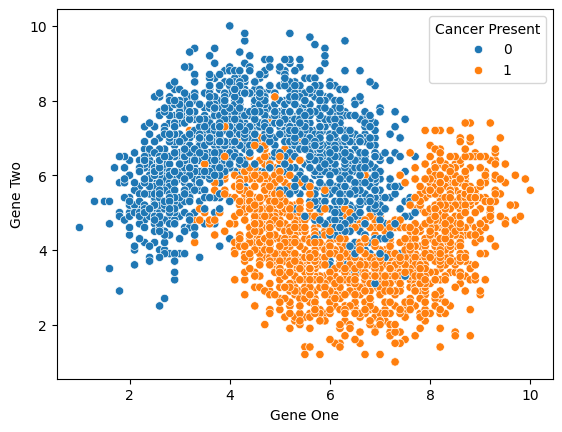

In [6]:
sns.scatterplot(data=df,x='Gene One',y='Gene Two',hue='Cancer Present')

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
X=df.drop('Cancer Present',axis=1)
y=df['Cancer Present']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
scaler=StandardScaler()

In [12]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [13]:
len(X_train)

2100

In [14]:
len(X_test)

900

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
#help(KNeighborsClassifier)

In [17]:
model=KNeighborsClassifier(n_neighbors=1)

In [18]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
y_pred=model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       470
           1       0.89      0.88      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



In [22]:
test_error_rates=[]
for k in range(1,30):
  model=KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  err=1-accuracy_score(y_test,y_pred)
  test_error_rates.append(err)


Text(0.5, 0, 'k value')

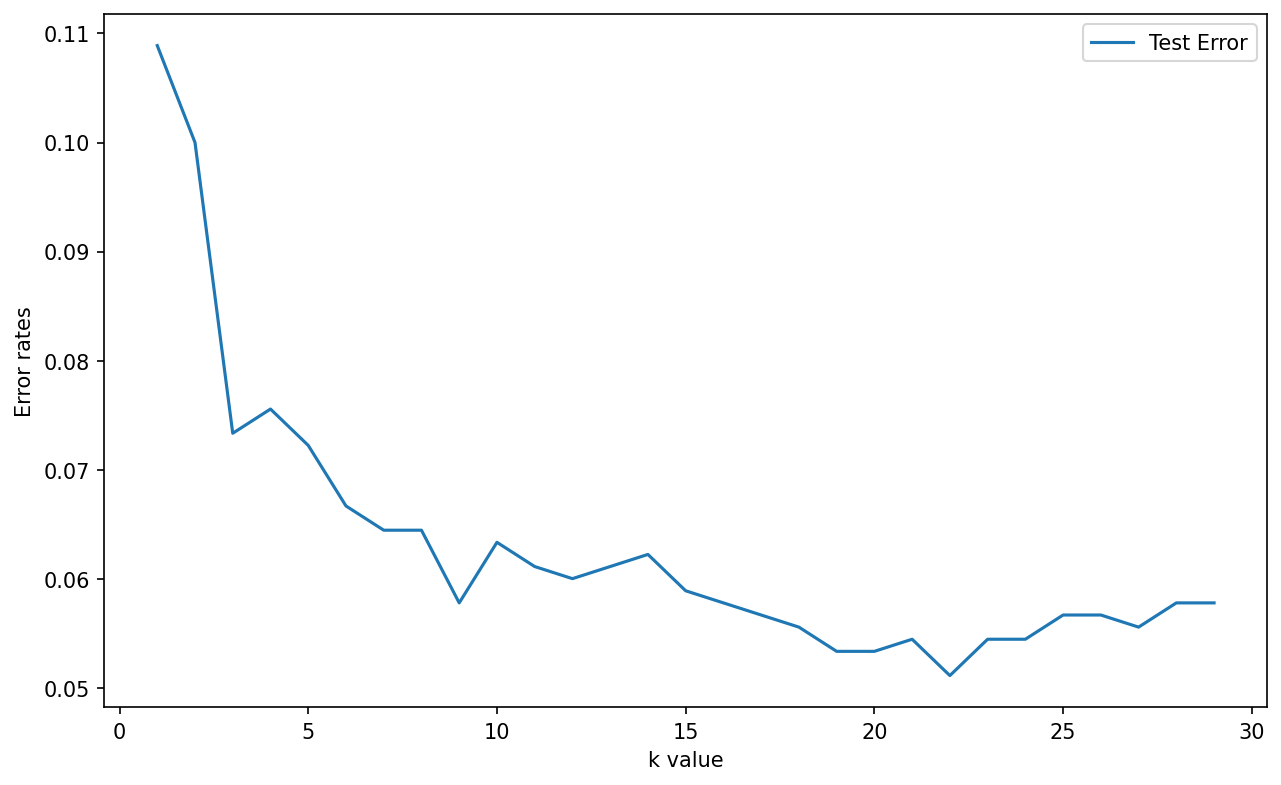

In [23]:
plt.figure(figsize=(10,6),dpi=150)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error rates')
plt.xlabel('k value')

In [25]:
knn=KNeighborsClassifier()

In [26]:
scaler=StandardScaler()

In [27]:
operation=[('scaler',scaler),('knn',knn)]

In [28]:
from sklearn.pipeline import Pipeline

In [31]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [32]:
pipe=Pipeline(operation)

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
k_value=list(range(1,20))

In [35]:
k_value

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [36]:
param_grid={'knn__n_neighbors':k_value}

In [38]:
#help(GridSearchCV)

In [39]:
full_cv_classifier=GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [40]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [42]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=16))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=16),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 16,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [44]:
len(full_cv_classifier.cv_results_['mean_test_score'])

19

In [46]:
scaler=StandardScaler()
knn16=KNeighborsClassifier(n_neighbors=16)
operation=[('scaler',scaler),('knn16',knn16)]


In [47]:
pipe=Pipeline(operation)

In [48]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn16', KNeighborsClassifier(n_neighbors=16))])

In [50]:
y_pred=pipe.predict(X_test)

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900

